In [101]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn import metrics
import numpy
import random
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [102]:
os.chdir("E:\\NYISO\\Final Datasets\\")

In [103]:
df=pd.read_csv('WEST_Summer.csv', parse_dates={'date':['Date','Time']})
df=df.drop(df.columns[1],axis=1)
df['weekday'] = df['date'].dt.day_name()
df['month'] = pd.DatetimeIndex(df['date']).month
df['hour'] = df['date'].dt.hour
df = pd.concat([df,pd.get_dummies(df.weekday)], axis=1, sort= False)
df = pd.concat([df,pd.get_dummies(df.month)], axis=1, sort= False)
df = pd.concat([df,pd.get_dummies(df.hour)], axis=1, sort= False)
df.set_index('date', inplace=True)
del df['weekday']
del df['month']
del df['hour']

cols = df.columns.tolist()
cols = cols[-41:] + cols[:7]
df = df[cols]
df = df.loc[:,~df.columns.duplicated()]
df.head(40)

,Peak,Population,Unemployment,Poverty,Household_Income,Friday,Monday,Saturday,Sunday,Thursday,...,21,22,23,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindSpeed
date,,,,,,,,,,,,,,,,,,,,,
2010-05-01 00:00:00,1398.4,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,53.723541,61.447082,0.000000,75.829376,29.020410,56.723541,3.617706
2010-05-01 01:00:00,1330.6,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,53.361771,62.170624,0.000000,73.296982,28.999557,57.085312,3.617706
2010-05-01 02:00:00,1275.3,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,53.276459,63.447082,0.000000,69.935212,29.010410,57.723541,5.170624
2010-05-01 03:00:00,1260.1,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,50.000000,64.170624,0.000000,60.658753,29.020410,56.447082,5.723541
2010-05-01 04:00:00,1256.4,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,49.723541,63.617706,0.000000,61.211670,29.012322,56.170624,5.170624
2010-05-01 05:00:00,1289.8,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,50.000000,64.894165,0.000000,58.488129,29.040410,56.447082,6.723541
2010-05-01 06:00:00,1292.9,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,51.585312,66.894165,0.000000,58.520523,29.049028,58.308853,5.000000
2010-05-01 07:00:00,1367.6,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,52.000000,70.000000,0.000000,53.361771,29.023175,59.638229,8.276459
2010-05-01 08:00:00,1448.4,716220.8981,8.385714,9.714286,46332.71429,0,0,1,0,0,...,0,0,0,52.000000,74.723541,0.000000,45.276459,29.027646,61.723541,15.170624


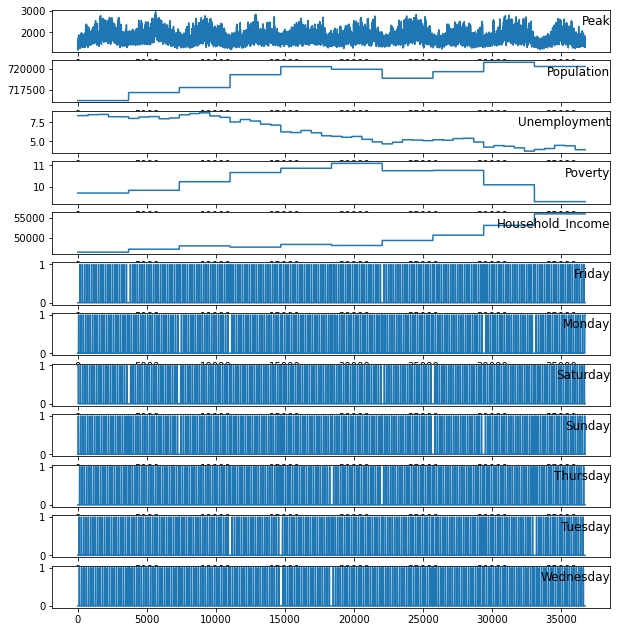

In [104]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3,4 , 5, 6, 7, 8, 9, 10, 11]
i = 1
# plot each column
pyplot.figure(figsize=(10,11))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [105]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[44:], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.120771        0.0   0.926761      0.224        0.0        0.0   
2   0.082544        0.0   0.926761      0.224        0.0        0.0   
3   0.051364        0.0   0.926761      0.224        0.0        0.0   
4   0.042794        0.0   0.926761      0.224        0.0        0.0   
5   0.040708        0.0   0.926761      0.224        0.0        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var35(t-1)  var36(t-1)  \
1        0.0        1.0        0.0         0.0  ...         0.0         0.0   
2        0.0        1.0        0.0         0.0  ...         0.0         0.0   
3        0.0        1.0        0.0         0.0  ...         0.0         0.0   
4        0.0        1.0        0.0         0.0  ...         0.0         0.0   
5        0.0        1.0        0.0         0.0  ...         0.0         0.0   

   var37(t-1)  var38(t-1)  var39(t-1)  var40(t-1)  var41(t-1)  var42(t-1)  \
1    0.597348    0.46

In [108]:
reframed.to_csv('Reframed.csv')

In [109]:
# split into train and test sets
values = reframed.values
n_train_hours = 153 * 24 * 9
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(33048, 1, 43) (33048,) (3672, 1, 43) (3672,)


In [112]:
nsamples, nx, ny = train_X.shape
d2_train_dataset_X = train_X.reshape((nsamples,nx*ny))

In [113]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(d2_train_dataset_X, train_y)   

RandomForestRegressor(random_state=0)

In [117]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [119]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(d2_train_dataset_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 70.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 155.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [120]:
nsamples, nx, ny = test_X.shape
d2_test_dataset_X = test_X.reshape((nsamples,nx*ny))

In [121]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

Evaluation Function

In [122]:

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Evaluate the Default Model

In [124]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(d2_train_dataset_X, train_y)
base_accuracy = evaluate(base_model, d2_test_dataset_X, test_y)

Model Performance
Average Error: 0.0180 degrees.
Accuracy = 92.20%.


Evaluate the Best Random Search Model

In [125]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, d2_test_dataset_X, test_y)

Model Performance
Average Error: 0.0175 degrees.
Accuracy = 92.39%.


In [126]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.20%.


# Grid Search

In [127]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': max_features,
    'min_samples_leaf': [ 1, 2, 3],
    'min_samples_split': [ 3, 5, 7],
    'n_estimators': [1300, 1400, 1500, 1600, 1700]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [128]:
# Fit the grid search to the data
grid_search.fit(d2_train_dataset_X, train_y);

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 129.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 229.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 392.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 592.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 614.5min finished


In [129]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1700}

Evaluate the Best Model from Grid Search

In [130]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_random, d2_test_dataset_X, test_y)

Model Performance
Average Error: 0.0175 degrees.
Accuracy = 92.39%.


In [131]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.20%.


In [133]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
print(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(best_random, d2_test_dataset_X, test_y)

Final Model Parameters:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1700, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Model Performance
Average Error: 0.0175 degrees.
Accuracy = 92.39%.


Text(0, 0.5, 'FEATURE NAMES')

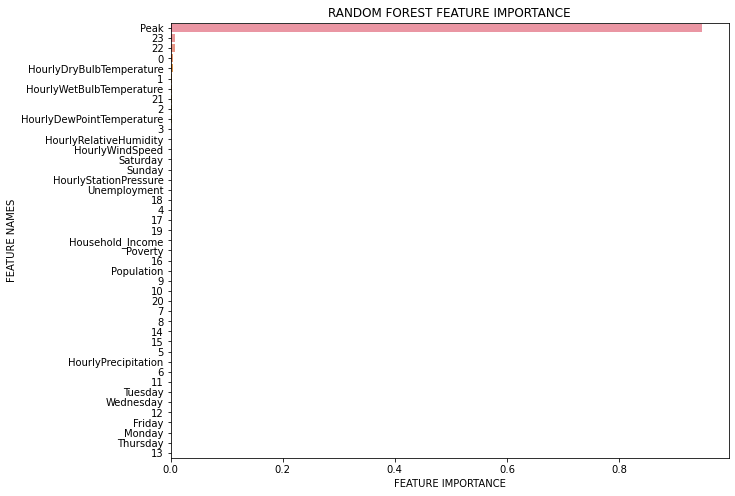

In [164]:
feature_importance = final_model.feature_importances_
feature_names  = df.columns
#Create a DataFrame using a Dictionary
fi_df = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance}, columns=['feature_names', 'feature_importance'])

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')